In [1]:
# 机器学习问题解决思路
    # 拿到数据后怎么了解数据(可视化)
    # 选择最贴切的机器学习算法
    # 定位模型状态(过/欠拟合)以及解决方法
    # 大量极的数据的特征分析与可视化
    # 各种损失函数(loss function)的优缺点及如何选择

In [6]:
# 我们先使用scikit-learn的make_classification函数来生产一份分类数据，然后模拟一下拿到实际数据后我们需要做的事情。

#numpy科学计算工具箱
import numpy as np
#使用make_classification构造1000个样本，每个样本有20个feature
from sklearn.datasets import make_classification

X, y = make_classification(1000, n_features=20, n_informative=2,  n_redundant=2, n_classes=2, random_state=0)

#存为dataframe格式
from pandas import DataFrame

hstack = np.hstack((X, y[:, None]))
df = DataFrame(hstack,  columns = list(range(20)) + ["class"])

# 看看前6列
df[:6]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0.0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1.0
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1.0
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1.0
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0.0
5,-0.262645,0.327590,0.997845,-1.577903,-0.828981,-0.202735,0.825932,-0.489252,0.849912,-0.035563,...,0.935624,1.741002,1.930498,0.069474,-0.643267,-0.257866,0.260081,-0.001670,-1.639319,1.0


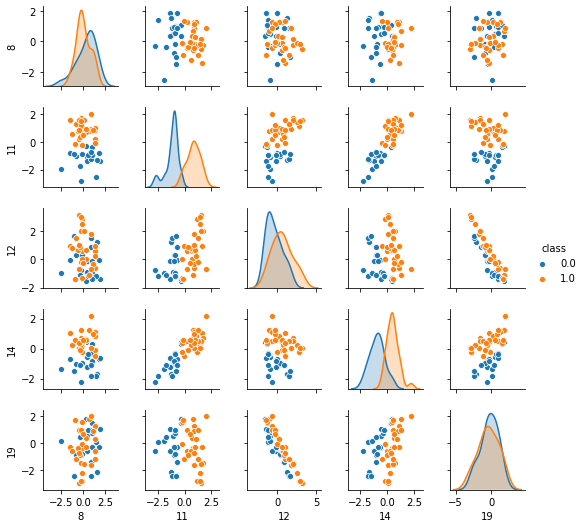

In [8]:
# 用来做数据可视化的工具包Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#使用pairplot去看不同特征维度pair下数据的空间分布状况
_ = sns.pairplot(df[:50], vars=[8, 11, 12, 14, 19], hue="class", height=1.5)
plt.show()

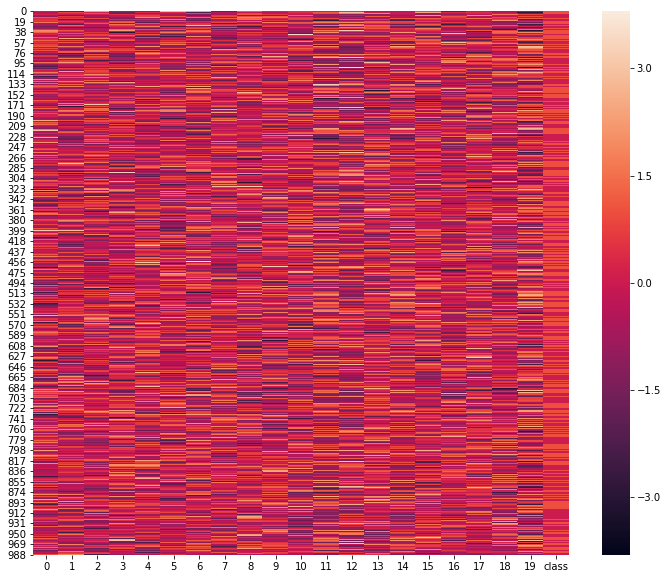

In [12]:
# 用Seanborn中的corrplot来计算计算各维度特征之间(以及最后的类别)的相关性
import matplotlib.pyplot as plt
import seaborn.linearmodels

plt.figure(figsize=(12, 10))
#_ = sns.corrplot(df, annot=False) # 被放弃了的方法
_ = sns.heatmap(df, annot=False) 
plt.show()

In [13]:
# 机器学习算法的选择

from sklearn.svm import LinearSVC
from sklearn.learning_curve import learning_curve

#绘制学习曲线，以确定模型的状况
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)
    plt.show()

#少样本的情况情况下绘出学习曲线
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",  X, y, ylim=(0.8, 1.01),  train_sizes=np.linspace(.05, 0.2, 5))

ModuleNotFoundError: No module named 'sklearn.learning_curve'

In [ ]:
# 如果训练集上表现良好，但在测试集和交叉验证上表现很差，恭喜你，过拟合了。用那个有名的学习曲线来看。

# 增大一些样本量，减少过拟合
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.1),
                    train_sizes=np.linspace(.1, 1.0, 5))

# 减少特征的量(只用我们觉得有效的特征)，减少过拟合
plot_learning_curve(LinearSVC(C=10.0), 
                    "LinearSVC(C=10.0) Features: 11&14", 
                    X[:, [11, 14]], 
                    y, 
                    ylim=(0.8, 1.0), 
                    train_sizes=np.linspace(.05, 0.2, 5))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest(f_classif, k=2) 会根据Anova F-value选出 最好的k=2个特征
# 在特征不多的情况下有此表现效果，特征很多时则相当消耗计算
plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=2)), # select two features
                               ("svc", LinearSVC(C=10.0))]), "SelectKBest(f_classif, k=2) + LinearSVC(C=10.0)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

In [ ]:
# 过拟合的有效应对方法：
    # (1)多项式你和模型中降低多项式次数
    # (2)神经网络中减少神经网络的层数和每层的结点数
    # (3)SVM中增加RBF-kernel的bandwidth等方式来降低模型的复杂度
    
# 但是仍然优先使用一下方法来降低过拟合
# 增强正则化作用(比如说这里是减小LinearSVC中的C参数)
plot_learning_curve(LinearSVC(C=0.1), "LinearSVC(C=0.1)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))

In [ ]:
# 在交叉验证集上做grid-search查找最好的正则化系数
from sklearn.grid_search import GridSearchCV
estm = GridSearchCV(LinearSVC(), 
                   param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]})
plot_learning_curve(estm, "LinearSVC(C=AUTO)", 
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))
print "Chosen parameter on 100 datapoints: %s" % estm.fit(X[:500], y[:500]).best_params_

In [ ]:
# l2正则化，它对于最后的特征权重的影响是，尽量打散权重到每个特征维度上，不让权重集中在某些维度上，出现权重特别高的特征。
# 而l1正则化，它对于最后的特征权重的影响是，让特征获得的权重稀疏化，也就是对结果影响不那么大的特征，干脆就拿不着权重。

plot_learning_curve(LinearSVC(C=0.1, penalty='l1', dual=False),
                    "LinearSVC(C=0.1, penalty='l1')", 
                    X, y, 
                    ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 

In [14]:
# 看看最后特征获得的权重
estm = LinearSVC(C=0.1, penalty='l1', dual=False)
estm.fit(X[:450], y[:450])  # 用450个点来训练
print "Coefficients learned: %s" % est.coef_
print "Non-zero coefficients: %s" % np.nonzero(estm.coef_)[1]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Coefficients learned: %s" % est.coef_)? (<ipython-input-14-30bcd3adf33a>, line 3)

In [ ]:
#构造一份环形数据
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=2)

#绘出学习曲线
plot_learning_curve(LinearSVC(C=0.25),"LinearSVC(C=0.25)",X, y, ylim=(0.5, 1.0),train_sizes=np.linspace(.1, 1.0, 5))

In [ ]:
# 可视化观察一下
f = DataFrame(np.hstack((X, y[:, None])), columns = range(2) + ["class"])
_ = sns.pairplot(df, vars=[0, 1], hue="class", size=3.5)

In [ ]:
# 对于欠拟合我们怎么办呢

    # 1.调整你的特征(找更有效的特征！！)
        # 加入原始特征的平方项作为新特征
X_extra = np.hstack((X, X[:, [0]]**2 + X[:, [1]]**2))
plot_learning_curve(LinearSVC(C=0.25), 
                    "LinearSVC(C=0.25) + distance feature",
                    X_extra, y, 
                    ylim=(0.5, 1.0), 
                    train_sizes=np.linspace(.1, 1.0, 5))

    # 2.使用更复杂一点的模型(比如说用非线性的核函数)，
        # 用了一个复杂一些的非线性rbf kernel
from sklearn.svm import SVC
# note: we use the original X without the extra feature
plot_learning_curve(SVC(C=2.5, kernel="rbf", gamma=1.0), 
                    "SVC(C=2.5, kernel='rbf', gamma=1.0)",X, y, 
                    ylim=(0.5, 1.0), 
                    train_sizes=np.linspace(.1, 1.0, 5))


In [15]:
'''
    对于过拟合：
        1.降低学习能力
            1.1.降低模型复杂度
            1.2.改善模型结构
        2.增加学习难度
            2.1.增加数据
            2.2.增加噪音
        3.各种正则化
            3.1.banchNormalization
            3.2.L2，L1正则化
            3.3.Dropout
            3.4.earlyStop
            3.5.等很多技术
        
    对于欠拟合：
        1.增加学习能力
            1.1.增加模型复杂度
            1.2.改善模型结构
        2.降低学习难度
             2.1.调整特征：人为分析
'''

'\n    对于过拟合：\n        1.降低学习能力\n            1.1.降低模型复杂度\n            1.2.改善模型结构\n        2.增加学习难度\n            2.1.增加数据\n            2.2.增加噪音\n        3.各种正则化\n            3.1.banchNormalization\n            3.2.L2，L1正则化\n            3.3.Dropout\n            3.4.earlyStop\n            3.5.等很多技术\n        \n    对于欠拟合：\n        1.增加学习能力\n            1.1.增加模型复杂度\n            1.2.改善模型结构\n        2.降低学习难度\n             2.1.调整特征：人为分析\n'

In [ ]:
# 在使用mini-batch的方式做训练的时候，使用交叉验证并不是很合适
# progressive validation 来在mini-batch上做

In [ ]:
# 生成大样本，高纬度特征数据
X, y = make_classification(200000, n_features=200, n_informative=25, n_redundant=0, n_classes=10, class_sep=2, random_state=0)

# 用SGDClassifier做训练，并画出batch在训练前后的得分差
from sklearn.linear_model import SGDClassifier

est = SGDClassifier(penalty="l2", alpha=0.001)
progressive_validation_score = []
train_score = []

for datapoint in range(0, 199000, 1000):
    X_batch = X[datapoint:datapoint+1000]
    y_batch = y[datapoint:datapoint+1000]
    
    if datapoint > 0:
        progressive_validation_score.append(est.score(X_batch, y_batch))
        
    est.partial_fit(X_batch, y_batch, classes=range(10))
    
    if datapoint > 0:
        train_score.append(est.score(X_batch, y_batch))
    
plt.plot(train_score, label="train score")
plt.plot(progressive_validation_score, label="progressive validation score")
plt.xlabel("Mini-batch")
plt.ylabel("Score")
plt.legend(loc='best')  

In [ ]:
#直接从sklearn中load数据集
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print "Dataset consist of %d samples with %d features each" % (n_samples, n_features)

# 绘制数字示意图
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
_ = plt.title('A selection from the 8*8=64-dimensional digits dataset')
plt.show()

In [ ]:
#import所需的package
from sklearn import (manifold, decomposition, random_projection)
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)

#定义绘图函数
from matplotlib import offsetbox
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]) 
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#记录开始时间
start_time = time.time()
X_projected = rp.fit_transform(X)

In [ ]:
# PCA降纬度
from sklearn import (manifold, decomposition, random_projection)

#TruncatedSVD 是 PCA的一种实现
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

#记录时间
start_time = time.time()
plot_embedding(X_pca,"Principal Components projection of the digits (time: %.3fs)" % (time.time() - start_time))

In [ ]:
# t-SNE，sklearn的manifold对其进行了实现，t-SNE是非线性变换的降为，消耗更多的计算和时间，但效果惊人
from sklearn import (manifold, decomposition, random_projection)

#降维
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
start_time = time.time()
X_tsne = tsne.fit_transform(X)

#绘图
plot_embedding(X_tsne, "t-SNE embedding of the digits (time: %.3fs)" % (time.time() - start_time))

In [ ]:
# TODO：t-SNE

In [17]:
# 损失函数的选择
import numpy as np
from matplotlib import plot as plt
#import matplotlib.plot as plt

# 改自http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-',
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'g-',
         label="Hinge loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-',
         label="Log loss")
plt.plot(xx, np.exp(-xx), 'c-',
         label="Exponential loss")
plt.plot(xx, -np.minimum(xx, 0), 'm-',
         label="Perceptron loss")

plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")
plt.show()

ImportError: cannot import name 'plot' from 'matplotlib' (/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py)

In [ ]:
'''
    **0-1损失函数(zero-one loss)**
    非常好理解，直接对应分类问题中判断错的个数。
    但是比较尴尬的是它是一个非凸函数，这意味着其实不是那么实用。
    hinge loss(SVM中使用到的)的健壮性相对较高(对于异常点/噪声不敏感)。但是它没有那么好的概率解释。
    
    **log损失函数(log-loss)**
    的结果能非常好地表征概率分布。
    因此在很多场景，尤其是多分类场景下，如果我们需要知道结果属于每个类别的置信度，那这个损失函数很适合。
    缺点是它的健壮性没有那么强，相对hinge loss会对噪声敏感一些。
    
    **多项式损失函数(exponential loss)**
    (AdaBoost中用到的)对离群点/噪声非常非常敏感。
    但是它的形式对于boosting算法简单而有效。
    
    **感知损失(perceptron loss)**
    可以看做是hinge loss的一个变种。
    hinge loss对于判定边界附近的点(正确端)惩罚力度很高。
    而perceptron loss，只要样本的判定类别结果是正确的，它就是满意的，而不管其离判定边界的距离。
    优点是比hinge loss简单，缺点是因为不是max-margin boundary，所以得到模型的泛化能力没有hinge loss强。
'''

In [ ]:
# 机器学习算法使用图谱才是这节课里用到的秘密武器